# NMF Practical Work

**Roland Badeau - Notebook code by Umut Simsekli** 

Telecom Paris - TSIA 206

## 1. By following the technique that we used in the lecture, derive the MUR algorithm by yourselves

In [1]:
%matplotlib inline

In [2]:
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms

# and IPython.display for audio output
import IPython.display as ipd

# Librosa for audio
import librosa
# # And the display module for visualization
import librosa.display


/var/folders/4v/n41dv2b1147ds406__7xy7zm0000gn/T/ipykernel_7656/1529239179.py:18: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(20*np.log10(np.abs(X)), origin="lower")


<Figure size 640x480 with 0 Axes>

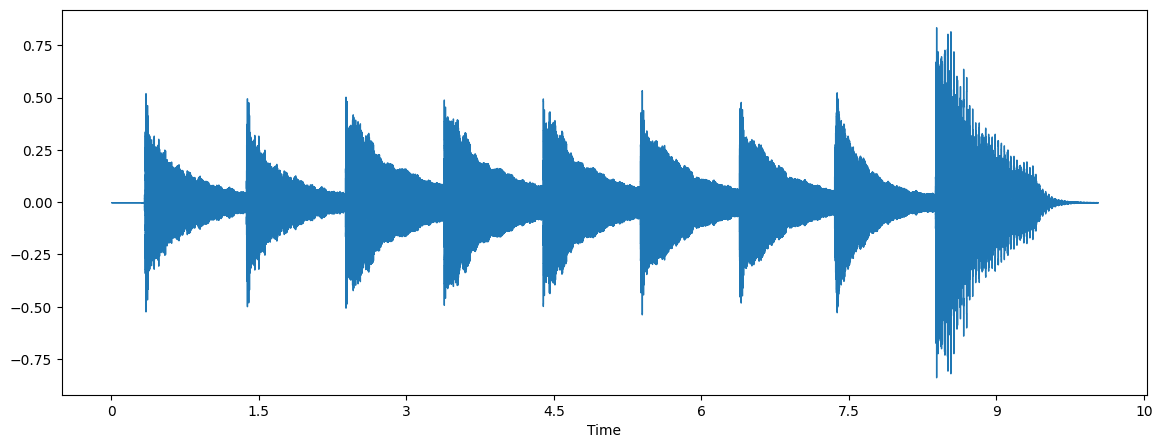

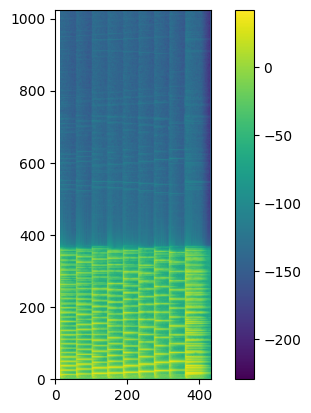

In [3]:
# Audio file
fname = 'Cmajor_piano8khz.wav'

# Load signal
y, sr = librosa.load(fname)

# Compute STFT
Xstft = librosa.stft(y, n_fft=2048, hop_length=512, win_length=None)
X = np.abs(Xstft)

#Visualize the waveform
plt.figure()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

#Visualize the spectrum
plt.figure()
plt.imshow(20*np.log10(np.abs(X)), origin="lower")
plt.colorbar()


### Deriving the MUR Algorithm

When we differentiate the cost function, we obtain:

$$
\frac{\partial d_\beta}{\partial W} = 0 = - \frac{(\beta - 1) X (WH)^{\beta - 2} H^T}{\beta - 1} + \frac{\beta (WH)^{\beta - 1} H^T}{\beta}
$$

Simplifying, we get:

$$
\frac{\partial d_\beta}{\partial W} = -X (WH)^{\beta - 2} H^T + (WH)^{\beta - 1} H^T
$$

So when we do a gradient descent on \(W\):

$$
W \leftarrow W - \eta_W \left( -X (WH)^{\beta - 2} H^T + (WH)^{\beta - 1} H^T \right)
$$

If we take \(\eta_W = \frac{W}{(WH)^{\beta - 1} H^T}\), we then have:

$$
W \leftarrow W - \frac{W}{(WH)^{\beta - 1} H^T} \left( -X (WH)^{\beta - 2} H^T + (WH)^{\beta - 1} H^T \right)
$$

Simplifying further, we get:

$$
W \leftarrow W + W \circ \frac{X (WH)^{\beta - 2} H^T}{(WH)^{\beta - 1} H^T} - W
$$

Therefore, the multiplicative update rule for \(W\) is:

$$
W \leftarrow W \circ \frac{X (WH)^{\beta - 2} H^T}{(WH)^{\beta - 1} H^T}
$$

Now we do the same for \(H\):

$$
\frac{\partial d_\beta}{\partial H} = 0 = - \frac{(\beta - 1) W^T (X (WH)^{\beta - 1})}{\beta - 1} + \frac{\beta W^T (WH)^{\beta - 1}}{\beta}
$$

Simplifying, we get:

$$
\frac{\partial d_\beta}{\partial H} = - W^T (X (WH)^{\beta - 2}) + W^T (WH)^{\beta - 1}
$$

So we have when doing a gradient descent:

$$
H \leftarrow H - \eta_H \left( -W^T (X \circ (WH)^{\beta - 2}) + W^T (WH)^{\beta - 1} \right)
$$

If we take \(\eta_H = \frac{H}{W^T (WH)^{\beta - 1}}\), then we obtain:

$$
H \leftarrow H - \frac{H}{W^T (WH)^{\beta - 1}} \left( -W^T (X \circ (WH)^{\beta - 2}) + W^T (WH)^{\beta - 1} \right)
$$

Simplifying further, we get:

$$
H \leftarrow H + H \circ \frac{W^T (X \circ (WH)^{\beta - 2})}{W^T (WH)^{\beta - 1}} - H
$$

Therefore, the multiplicative update rule for \(H\) is:

$$
H \leftarrow H \circ \frac{W^T (X \circ (WH)^{\beta - 2})}{W^T (WH)^{\beta - 1}}
$$


## 2. Implement MUR for NMF with beta-divergence 

In [17]:

def MUR(X, k, beta=2, iterations=100):
  # Initialisation de W et H
  i, j = X.shape
  W = np.random.rand(i, k)+1e-6
  H = np.random.rand(k, j)+1e-6
  for _ in range(iterations):

    X_hat = W@H
    tmp = X * np.power(X_hat, beta-2)
    tmp = tmp @ H.T
    tmp = tmp / (np.power(X_hat, beta-1)@ H.T)
    W = W * tmp

    X_hat = W @ H
    tmp = X * np.power(X_hat, beta-2)
    tmp = W.T @ tmp
    tmp = tmp / (W.T @ np.power(X_hat, beta-1))
    H = H * tmp

  return W, H

W, H = MUR(X, 8, beta=2)

/var/folders/4v/n41dv2b1147ds406__7xy7zm0000gn/T/ipykernel_7656/2935466275.py:3: RuntimeWarning: invalid value encountered in log
  plt.imshow(20*np.log(W), aspect='auto',interpolation="None", origin="lower")
/var/folders/4v/n41dv2b1147ds406__7xy7zm0000gn/T/ipykernel_7656/2935466275.py:9: RuntimeWarning: invalid value encountered in log
  plt.imshow(20*np.log(H), aspect='auto',interpolation="None", origin="lower")


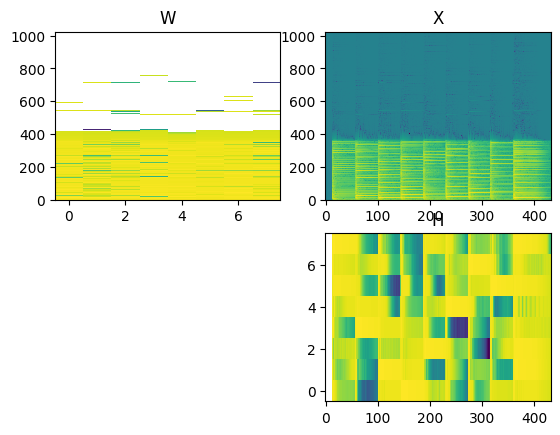

<function matplotlib.pyplot.subplot_tool(targetfig=None)>

In [18]:
fig = plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(20*np.log(W), aspect='auto',interpolation="None", origin="lower")
plt.title('W')
plt.subplot(2, 2, 2)
plt.imshow(20*np.log10(np.abs(X)), aspect='auto',interpolation="None", origin="lower")
plt.title('X')
plt.subplot(2, 2, 4)
plt.imshow(20*np.log(H), aspect='auto',interpolation="None", origin="lower")
plt.title('H')
plt.show()
plt.subplot_tool


## 3. Experiment with the algorithm parameters, such as $\beta$, number of columns in $W$, STFT window size, hop size, etc. 

beta = 0 k = 4 hop_size = 512 window_size = 512


/var/folders/4v/n41dv2b1147ds406__7xy7zm0000gn/T/ipykernel_7656/637946814.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(20*np.log10(np.abs(X)), aspect='auto',interpolation="None", origin="lower")
/var/folders/4v/n41dv2b1147ds406__7xy7zm0000gn/T/ipykernel_7656/637946814.py:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(20*np.log(H), aspect='auto',interpolation="None", origin="lower")


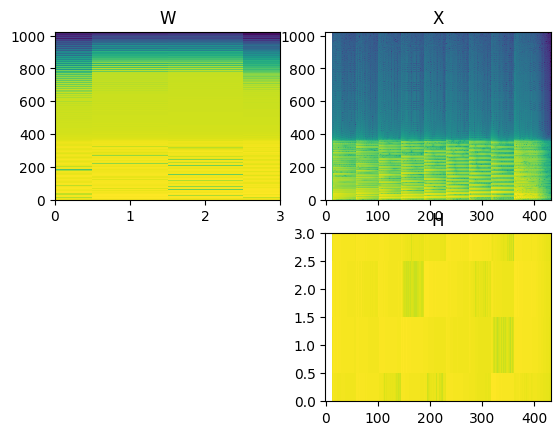

beta = 0 k = 8 hop_size = 512 window_size = 512


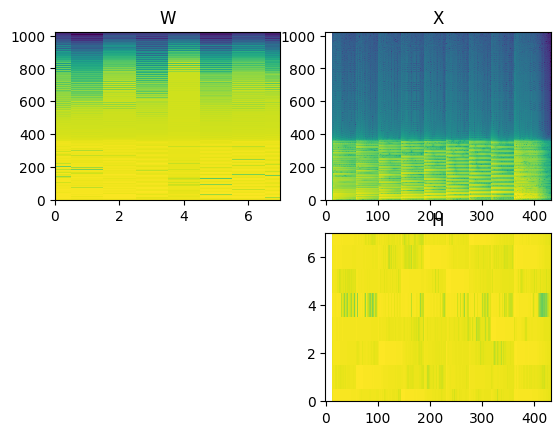

beta = 1 k = 4 hop_size = 512 window_size = 512


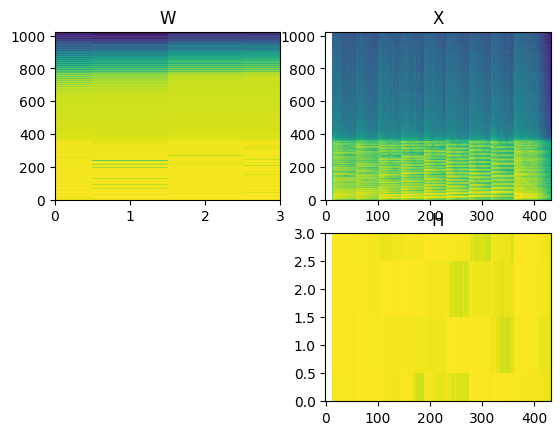

beta = 1 k = 8 hop_size = 512 window_size = 512


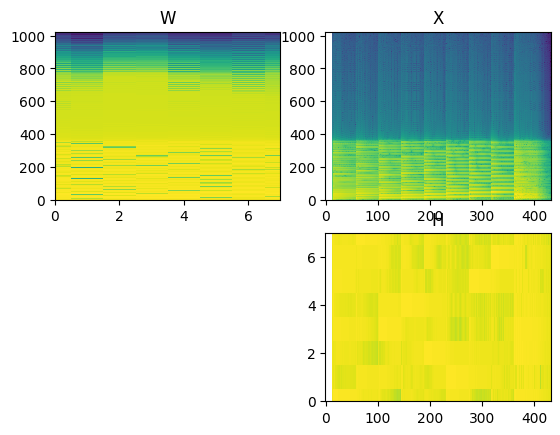

beta = 2 k = 4 hop_size = 512 window_size = 512


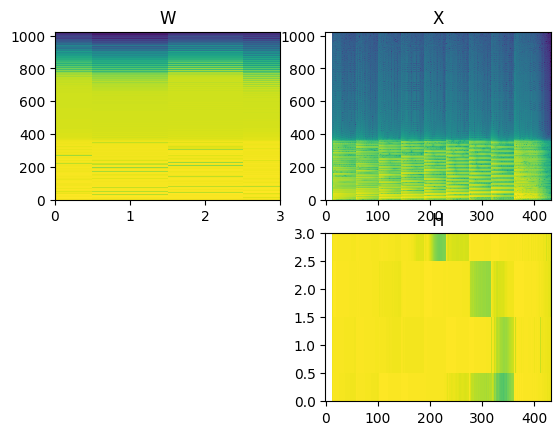

beta = 2 k = 8 hop_size = 512 window_size = 512


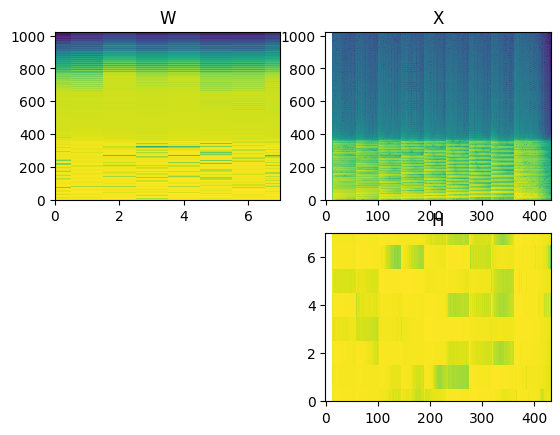

beta = 0 k = 4 hop_size = 512 window_size = 1024


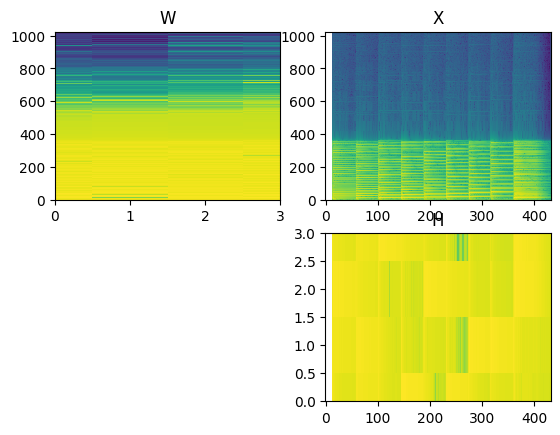

beta = 0 k = 8 hop_size = 512 window_size = 1024


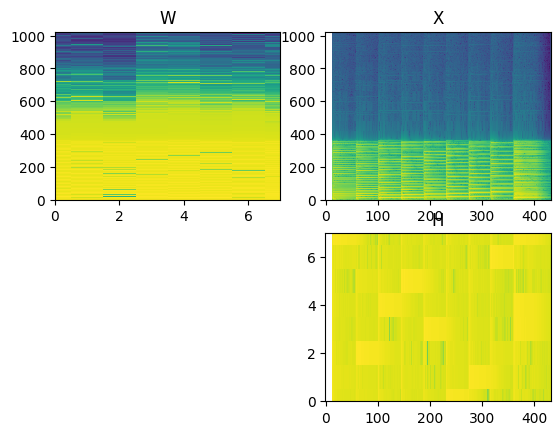

beta = 1 k = 4 hop_size = 512 window_size = 1024


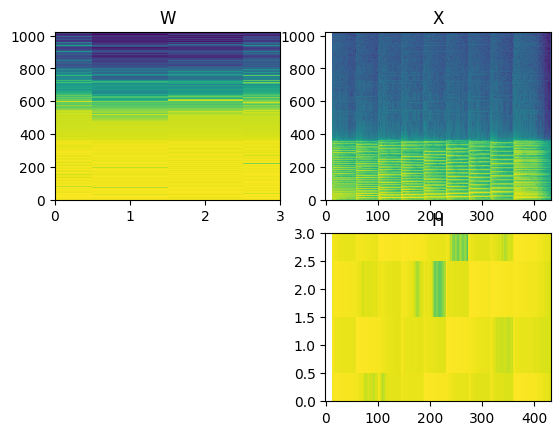

beta = 1 k = 8 hop_size = 512 window_size = 1024


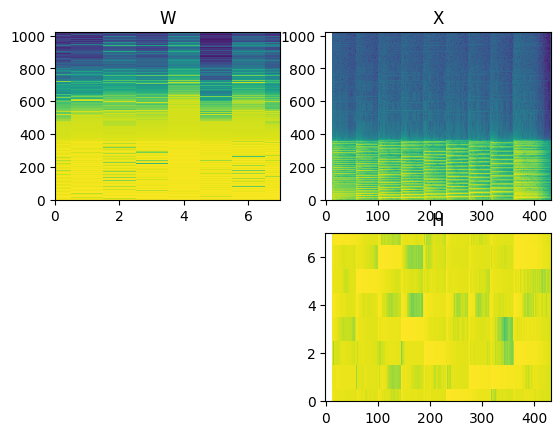

beta = 2 k = 4 hop_size = 512 window_size = 1024


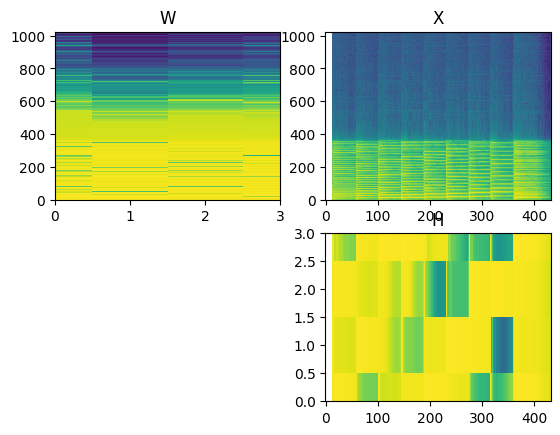

beta = 2 k = 8 hop_size = 512 window_size = 1024


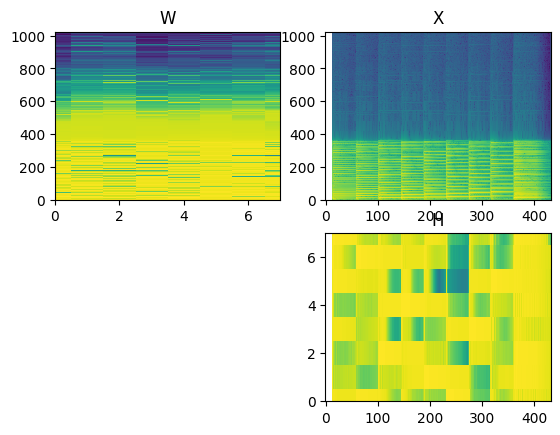

beta = 0 k = 4 hop_size = 1024 window_size = 512


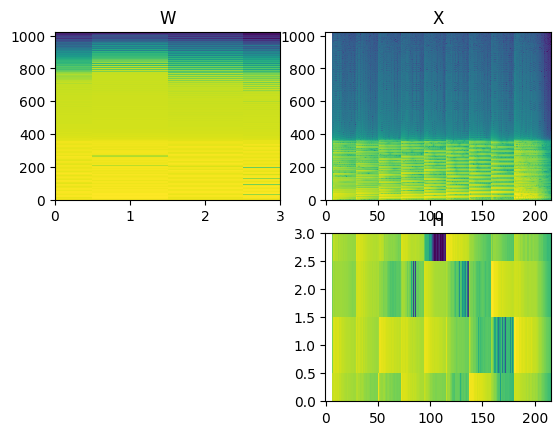

beta = 0 k = 8 hop_size = 1024 window_size = 512


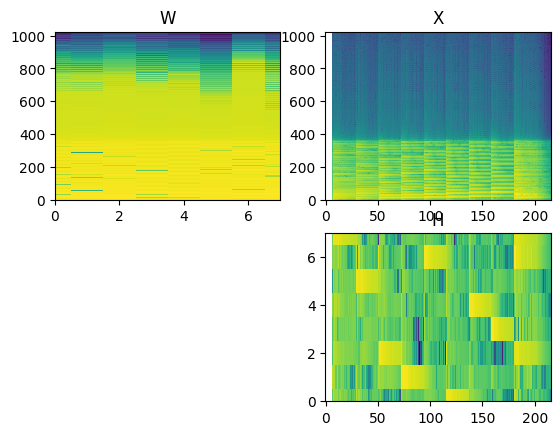

beta = 1 k = 4 hop_size = 1024 window_size = 512


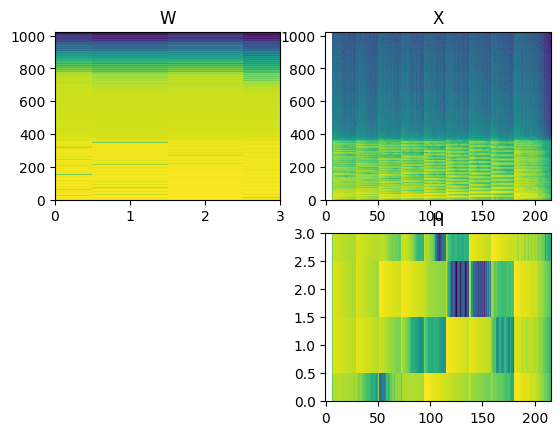

beta = 1 k = 8 hop_size = 1024 window_size = 512


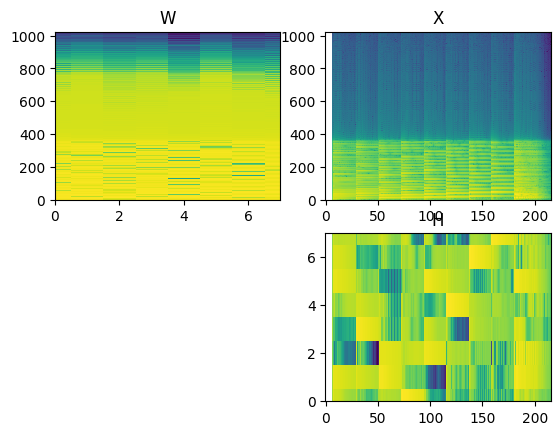

beta = 2 k = 4 hop_size = 1024 window_size = 512


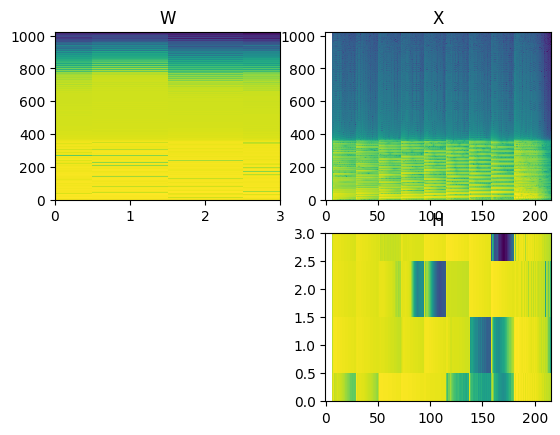

beta = 2 k = 8 hop_size = 1024 window_size = 512


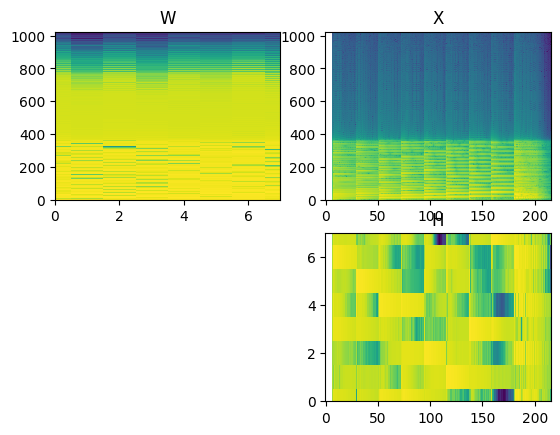

beta = 0 k = 4 hop_size = 1024 window_size = 1024


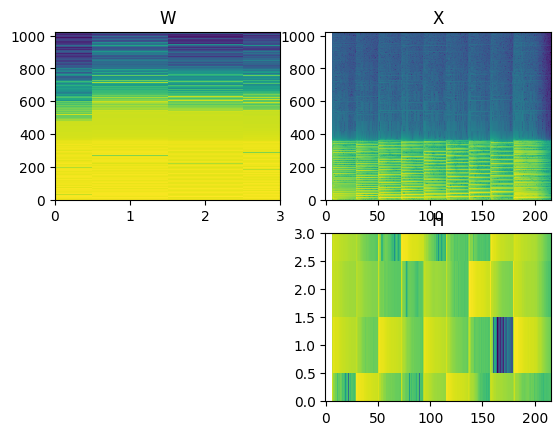

beta = 0 k = 8 hop_size = 1024 window_size = 1024


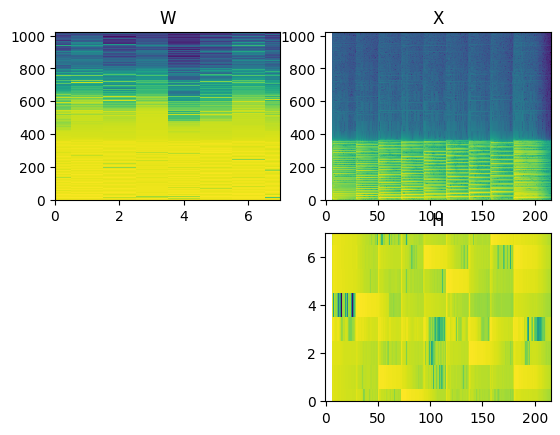

beta = 1 k = 4 hop_size = 1024 window_size = 1024


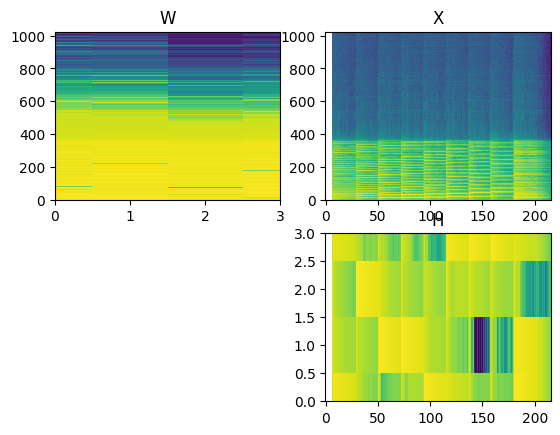

beta = 1 k = 8 hop_size = 1024 window_size = 1024


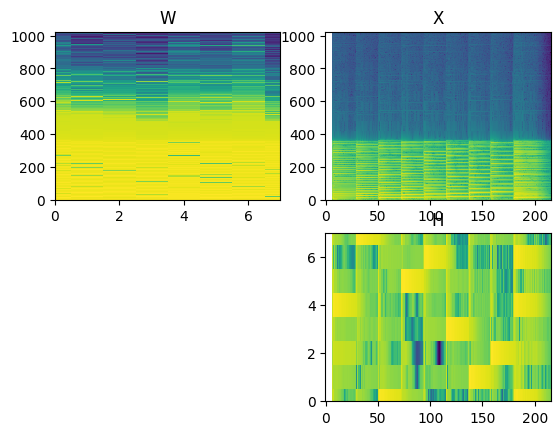

beta = 2 k = 4 hop_size = 1024 window_size = 1024


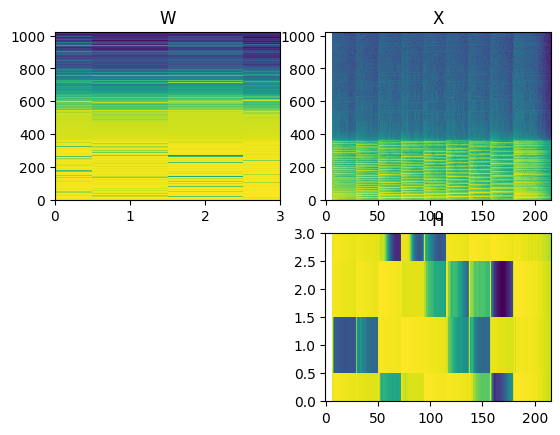

beta = 2 k = 8 hop_size = 1024 window_size = 1024


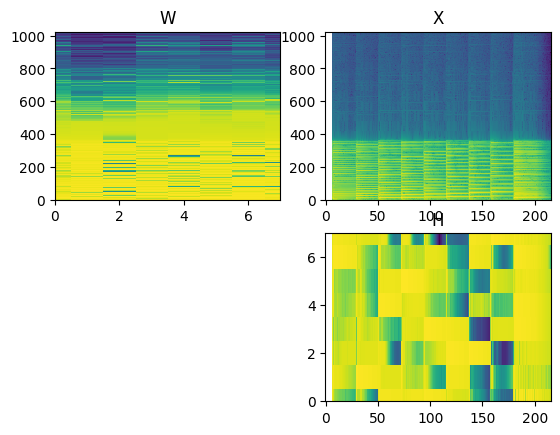

In [6]:
betas = [0, 1, 2]
ks = [4, 8]
hop_sizes = [512, 1024]
window_sizes = [512, 1024]

for hop_size in hop_sizes :
    for window_size in window_sizes :
        Xstft = librosa.stft(y, n_fft=2048, hop_length=hop_size, win_length=window_size)
        X = np.abs(Xstft)
        for beta in betas:
            for k in ks :
                print('beta =', beta, 'k =', k, 'hop_size =', hop_size, 'window_size =', window_size)
                W, H = MUR(X, k, beta=beta)
                fig = plt.figure()
                plt.subplot(2, 2, 1)
                plt.imshow(20*np.log(W), aspect='auto',interpolation="None", origin="lower")
                plt.xlim(0,k-1)
                plt.title('W')
                plt.subplot(2, 2, 2)
                plt.imshow(20*np.log10(np.abs(X)), aspect='auto',interpolation="None", origin="lower")
                plt.title('X')
                plt.subplot(2, 2, 4)
                plt.imshow(20*np.log(H), aspect='auto',interpolation="None", origin="lower")
                plt.title('H')
                plt.ylim(0,k-1)
                plt.show()
                plt.subplot_tool
                # save the figure
                fig.savefig('beta'+str(beta)+'_k'+str(k)+'_hop_size'+str(hop_size)+'_window_size'+str(window_size)+'.png')


## 4. Reconstruct each musical note separately

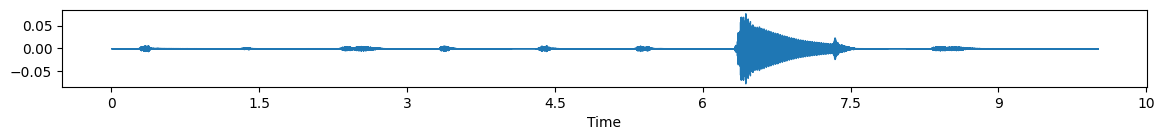

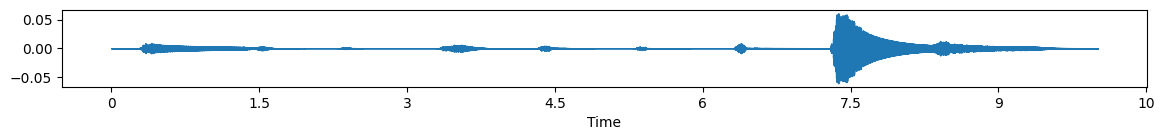

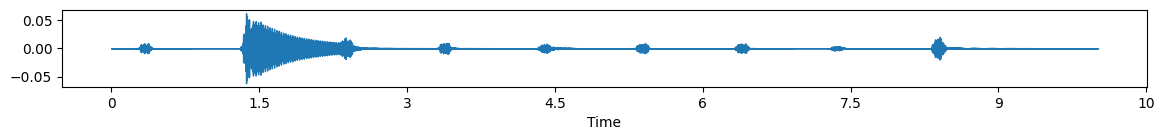

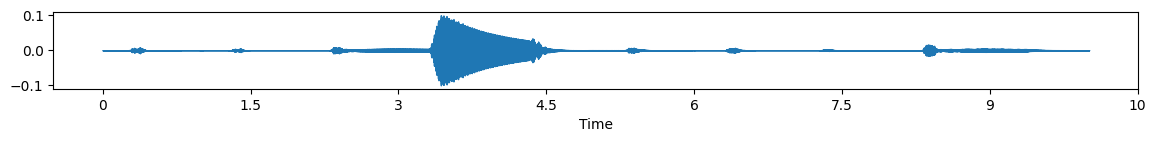

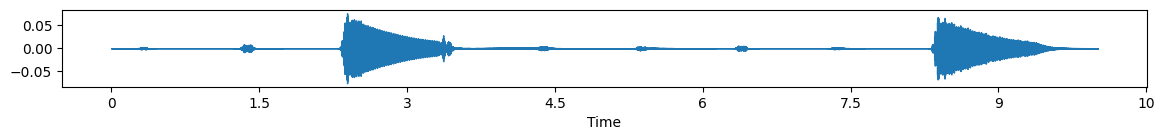

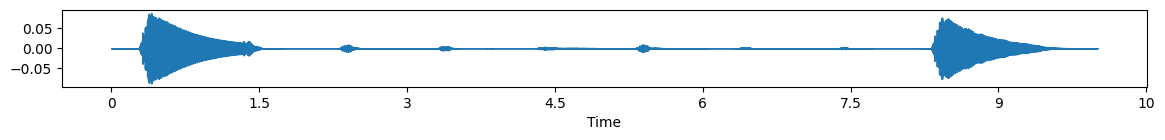

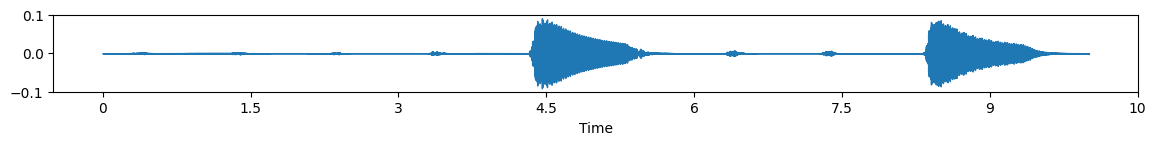

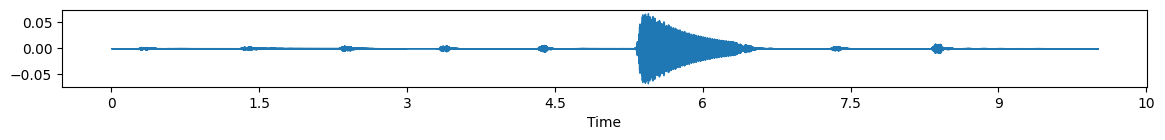

In [19]:
from IPython.display import Audio, display

Xstft = librosa.stft(y, n_fft=2048, hop_length=512, win_length=None)
X = np.abs(Xstft) - 1e-6
k = 8
W, H = MUR(X, k, beta=2)
Xr = []
xr = []
for i in range(k):
    R = X * (np.outer(W[:,i],H[i,:])/np.dot(W,H))
    r = librosa.istft(R, hop_length=512)
    Xr.append(R)
    xr.append(r)

for i in range(k):
    plt.figure(figsize=(14, 1))
    librosa.display.waveshow(xr[i], sr=sr)
    plt.show()
    audio = Audio(xr[i], rate=sr)
    display(audio)


In [8]:
yy = np.zeros(len(xr[0]))
for i in range(k):
    yy += xr[i]
audio = Audio(yy, rate=sr)
display(audio)


In [9]:
# Example reconstruction
y_hat = librosa.istft(Xstft)
ipd.Audio(y_hat, rate=sr)
